# Социальный портрет семьи, воспитывающей ребенка с ОВЗ

Данный проект - это возможность помочь всероссийской организации родителей детей-инвалидов (ВОРДИ), занимающейся поддержкой родителей детей с особыми потребностями в Белгородской области.

[Официальный сайт](https://vordi.org/)

<b>Задачи:</b>
- провести анализ данных, 
- определить общие тенденции и особенности среди семей, воспитывающих детей с особыми потребностями (в нашем распоряжении информация о доходах, численности семьи, финансовом положении и других социальных факторах, которые могут влиять на жизнь этих семей).


<b>Цель:</b>
- дать заказчику возможность понять, кто именно отвечает на вопросы его опросника. Составить социальные портреты семей, которые дают ответы на вопросы анкеты. Для каждого социального портрета нужно будет определить доступность услуг, исходя из данных. Для этого нужно будет построить дашборд в Tableau.

<b>Ход работы:</b>
1. [Импорт библиотек. Предобработка](#import) - частично выполнена в excel, частично - в jupiter.
2. [Исследование данных](#analysis) 
3. [Выдвижение гипотез](#hypothesis_1)
4. [Проверка гипотез](#hypothesis_2)
5. [Выводы](#conclusion)

<a id="import"> </a>
# Импорт библиотек. Предобработка

In [4]:
import pandas as pd
import numpy as np

In [5]:
vordi = pd.read_excel('vordi_eda_family.xlsx', engine='openpyxl', header=(0,1))

In [6]:
vordi.head(3)

Отметка времени  \
       Unnamed: 0_level_1   
0 2021-04-25 20:08:38.212   
1 2021-05-25 09:39:55.299   
2 2021-05-27 09:54:29.263   

  Можно ли сказать, что в нашем регионе создана инклюзивное пространство (комфортная среда, позволяющая всем в равной степени получать и использовать блага цивилизации и услуг) для детей-инвалидов?  \
                                                                                                                                                                                   Unnamed: 1_level_1   
0           Нет, работа ведется, но результатов мало                                                                                                                                                    
1         Нет, не делается ничего в этом направлении                                                                                                                                                    
2  Да, по крайней мере для этого много делается и...                                                                                                                                                    

  Можно ли сказать, что ваш ребенок имеет те же возможности (которыми он при желании может воспользоваться), что и здоровые дети?  \
                                                                                                               Unnamed: 2_level_1   
0                                               -0.5                                                                                
1                                                1.0                                                                                
2                                                0.5                                                                                

  Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка?  \
                                                                                                       Право на труд   
0                                               -1.0                                                                   
1                                                0.5                                                                   
2                                                0.5                                                                   

                                                  \
  Право на отдых Право на социальное обеспечение   
0           -1.0                             0.5   
1            0.5                             0.5   
2            0.5                             0.5   

                                                  \
  Право на охрану и помощь семье Право на жилище   
0                           -1.0            -1.0   
1                            0.5             0.5   
2                            0.5             0.5   

                                                 \
  Право на охрану здоровья и медицинскую помощь   
0                                          -1.0   
1                                           0.5   
2                                           0.5   

                                           ...  \
  Право на благоприятную окружающую среду  ...   
0                                     0.5  ...   
1                                     0.5  ...   
2                                    -1.0  ...   

  Вид образовательной организации, в которой обучается Ваш ребенок:  \
                                               Unnamed: 198_level_1   
0                                          выпускник                  
1                                          выпускник                  
2                                          выпускник                  

  Оказывает ли Вам кто-то помощь в уходе за ребенком-инвалидом  \
           Помогают члены семьи, проживающие вместе с ребенком   
0                                                0.0             
1       

In [1300]:
# объединим мультииндекс в индекс

vordi.columns = [col[0] + ' ' + col[1] for col in vordi.columns]

In [1301]:
# приведем названия столбцов к единому формату

columns = []

for column in vordi.columns:
    string = column.split('Unnamed: ')[0]
    string = string.rstrip().rstrip('?').rstrip('.')
    columns.append(string)

In [1302]:
vordi.columns = columns

In [1303]:
# округлим возраст респондента и возраст ребенка

vordi['Укажите, пожалуйста, возраст ребенка-инвалида'] = round(vordi['Укажите, пожалуйста, возраст ребенка-инвалида'])
vordi['Укажите Ваш возраст'] = round(vordi['Укажите Ваш возраст'])

In [1304]:
# изучим общую информацию

vordi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Columns: 208 entries, Отметка времени to Нозология
dtypes: datetime64[ns](1), float64(164), object(43)
memory usage: 3.3+ MB


In [1305]:
vordi.columns.tolist()

['Отметка времени',
 'Можно ли сказать, что в нашем регионе создана инклюзивное пространство (комфортная среда, позволяющая всем в равной степени получать и использовать блага цивилизации и услуг) для детей-инвалидов',
 'Можно ли сказать, что ваш ребенок имеет те же возможности (которыми он при желании может воспользоваться), что и здоровые дети',
 'Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? Право на труд',
 'Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? Право на отдых',
 'Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? Право на социальное обеспечение',
 'Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? Право на охрану и помощь семье',
 'Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящ

In [1306]:
# изучим пропущенные значения

missing_data = vordi.isnull()

In [1307]:
for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())
    print(" ")

False    2108
True        1
Name: Отметка времени, dtype: int64
 
False    2108
True        1
Name: Можно ли сказать, что в нашем регионе создана инклюзивное пространство (комфортная среда, позволяющая всем в равной степени получать и использовать блага цивилизации и услуг) для детей-инвалидов, dtype: int64
 
False    2108
True        1
Name: Можно ли сказать, что ваш ребенок имеет те же возможности (которыми он при желании может воспользоваться), что и здоровые дети, dtype: int64
 
False    2108
True        1
Name: Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? Право на труд, dtype: int64
 
False    2108
True        1
Name: Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? Право на отдых, dtype: int64
 
False    2108
True        1
Name: Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? Прав

Name: Обращались ли Вы за помощью, в связи с проблемами ребенка-инвалида, в официальные инстанции? Педагогическая помощь вашему ребенку, dtype: int64
 
False    2108
True        1
Name: Обращались ли Вы за помощью, в связи с проблемами ребенка-инвалида, в официальные инстанции? Вопросы дошкольного образования, dtype: int64
 
False    2108
True        1
Name: Обращались ли Вы за помощью, в связи с проблемами ребенка-инвалида, в официальные инстанции? Вопросы школьного образования, dtype: int64
 
False    2108
True        1
Name: Обращались ли Вы за помощью, в связи с проблемами ребенка-инвалида, в официальные инстанции? Приобретение технических средств реабилитации, dtype: int64
 
False    2108
True        1
Name: Обращались ли Вы за помощью, в связи с проблемами ребенка-инвалида, в официальные инстанции? Санаторно-курортное лечение, dtype: int64
 
False    2108
True        1
Name: Обращались ли Вы за помощью, в связи с проблемами ребенка-инвалида, в официальные инстанции? Вопросы адапт

False    2108
True        1
Name: Оцените, пожалуйста доступность получения услуги медицинского обслуживания и обеспечения для детей-инвалидов? Доступность (наличие) организаций, предоставляющих услугу, dtype: int64
 
False    2108
True        1
Name: Оцените, пожалуйста доступность получения услуги медицинского обслуживания и обеспечения для детей-инвалидов? Возможность добраться до организации, предоставляющей услугу, dtype: int64
 
False    2108
True        1
Name: Оцените, пожалуйста доступность получения услуги медицинского обслуживания и обеспечения для детей-инвалидов? Доступная среда внутри организации, dtype: int64
 
False    2108
True        1
Name: Получаете ли ваш ребенок услуги реабилитации, dtype: int64
 
True     1208
False     901
Name: Если Вы не пользовались возможностью получить услуги реабилитации для Вашего ребенка, в чем причина, dtype: int64
 
False    2108
True        1
Name: Задумывались ли Вы о том, как будет организована и возможна ли полноценная трудовая дея

Name: Ваш семейный доход (денежные поступления) включает Ежемесячная денежная выплата опекуну на компенсацию оплаты жилого помещения и социальных услуг, dtype: int64
 
False    2108
True        1
Name: Ваш семейный доход (денежные поступления) включает Ежемесячное пособие опекуну на ребенка-инвалида, dtype: int64
 
False    2108
True        1
Name: Ваш семейный доход (денежные поступления) включает Иные социальные выплаты, dtype: int64
 
False    2108
True        1
Name: Ваш семейный доход (денежные поступления) включает Зарплата отца, dtype: int64
 
False    2108
True        1
Name: Ваш семейный доход (денежные поступления) включает Зарплата матери, dtype: int64
 
False    2108
True        1
Name: Ваш семейный доход (денежные поступления) включает Зарплата другого члена семьи, проживающего совместно, dtype: int64
 
False    2108
True        1
Name: Ваш семейный доход (денежные поступления) включает Алименты, dtype: int64
 
False    2108
True        1
Name: Ваш семейный доход (денежные

В исходном датасете было 2108 строк, каждая строка - ответы участника опроса, 208 колонок.

Количество пропущенных значений варьируется взависимости от типа вопроса: вопросы, требующие развернутого ответа, чаще игнорировались респондентами (например, 'Если Вы не пользовались услугами психолого-медико-педагогической комиссии для Вашего ребенка, в чем причина?'). 

Исходный датасет не слишком удобен для исследования из-за большого количества столбцов. В дальнейшем датасет vordi будет разделен для удобства.

<a id="analysis"> </a>
# Исследование данных

Имеющийся у нас датасет - это оцифрованный опросник, который заполняли официальные представители детей с ограниченными возможностями здоровья.

Изучив данные, мы можем условно разделить все колонки-"вопросы" на две группы:
- "вопросы", относящиеся к качеству предоставляемых услуг в регионе
- и "вопросы", относящиеся непосредственно к ребенку и членам его семьи (состав семьи, нозология, уровень дохода, место проживания и прочее).

Разделим исходный датасет на два для удобства.

In [1308]:
# оценка качества предоставляемых услуг

quality = vordi.iloc[:, :148]
quality.head(3)

,Отметка времени,"Можно ли сказать, что в нашем регионе создана инклюзивное пространство (комфортная среда, позволяющая всем в равной степени получать и использовать блага цивилизации и услуг) для детей-инвалидов","Можно ли сказать, что ваш ребенок имеет те же возможности (которыми он при желании может воспользоваться), что и здоровые дети","Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? Право на труд","Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? Право на отдых","Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? Право на социальное обеспечение","Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? Право на охрану и помощь семье","Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? Право на жилище","Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? Право на охрану здоровья и медицинскую помощь","Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? Право на благоприятную окружающую среду",...,"Каким услугами, предоставляемыми общественными организациями, Вы пользовались для вашей семьи и вашего ребенка, какими бы воспользовались при возможности? Образовательные услуги для ребенка","Каким услугами, предоставляемыми общественными организациями, Вы пользовались для вашей семьи и вашего ребенка, какими бы воспользовались при возможности? Образовательные услуги для взрослых (обучение, повышение квалификации и или переквалификация)","Каким услугами, предоставляемыми общественными организациями, Вы пользовались для вашей семьи и вашего ребенка, какими бы воспользовались при возможности? Социальная помощь (по уходу за ребенком, присмотр)","Каким услугами, предоставляемыми общественными организациями, Вы пользовались для вашей семьи и вашего ребенка, какими бы воспользовались при возможности? Помощь в трудоустройстве","Каким услугами, предоставляемыми общественными организациями, Вы пользовались для вашей семьи и вашего ребенка, какими бы воспользовались при возможности? Правовая помощь","Каким услугами, предоставляемыми общественными организациями, Вы пользовались для вашей семьи и вашего ребенка, какими бы воспользовались при возможности? Реабилитационные занятия","Каким услугами, предоставляемыми общественными организациями, Вы пользовались для вашей семьи и вашего ребенка, какими бы воспользовались при возможности? Адаптивный спорт",Знаете ли Вы о работе регионального отделения ВОРДИ (Всероссийская организация родителей детей-инвалидов) в Белгородской области,"Как Вы считаете, должны ли родители объединяться для защиты прав своих детей",Готовы ли Вы к участию работе общественных организаций
0,2021-04-25 20:08:38.212,"Нет, работа ведется, но результатов мало",-0.5,-1.0,-1.0,0.5,-1.0,-1.0,-1.0,0.5,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,Знаю,"Обязательно должны, в одиночку со всеми пробле...",Уже
1,2021-05-25 09:39:55.299,"Нет, не делается ничего в этом направлении",1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,Не слышал,"Обязательно должны, в одиночку со всеми пробле...","Да, готов к активной работе"
2,2021-05-27 09:54:29.263,"Да, по крайней мере для этого много делается и...",0.5,0.5,0.5,0.5,0.5,0.5,0.5,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Не слышал,"Обязательно должны, в одиночку со всеми пробле...","Нет, но готов принимать участие в мероприятиях"


In [1309]:
quality['Можно ли сказать, что в нашем регионе создана инклюзивное пространство (комфортная среда, позволяющая всем в равной степени получать и использовать блага цивилизации и услуг) для детей-инвалидов'].value_counts()

Да, по крайней мере для этого много делается и результаты видны    966
Нет, работа ведется, но результатов мало                           670
Да, однозначно                                                     396
Нет, не делается ничего в этом направлении                          75
Нет, работа ведется, но результатов маловато                         1
Name: Можно ли сказать, что в нашем регионе создана инклюзивное пространство (комфортная среда, позволяющая всем в равной степени получать и использовать блага цивилизации и услуг) для детей-инвалидов, dtype: int64

In [1310]:
# характеристика семьи, воспитывающей ребенка с ОВЗ

family = vordi.iloc[:, np.r_[0:1, 150:208]]
family.head(3)

,Отметка времени,С какого возраста Вы зафиксировали нарушение здоровья вашего ребенка,"Укажите, пожалуйста, статус Вашего ребенка",Насколько тяжела ситуация со здоровьем ребенка,"Опишите, пожалуйста, ваш состав семьи Полная семья (мать, отец)","Опишите, пожалуйста, ваш состав семьи Неполная семья (один родитель)","Опишите, пожалуйста, ваш состав семьи Расширенная семья, совместное проживание с родственниками, не требующими ухода","Опишите, пожалуйста, ваш состав семьи Расширенная семья, совместное проживание с родственниками, требующими ухода","Опишите, пожалуйста, ваш состав семьи В семье один ребенок","Опишите, пожалуйста, ваш состав семьи В семье два ребенка",...,"Вид образовательной организации, в которой обучается Ваш ребенок:","Оказывает ли Вам кто-то помощь в уходе за ребенком-инвалидом Помогают члены семьи, проживающие вместе с ребенком","Оказывает ли Вам кто-то помощь в уходе за ребенком-инвалидом Помогают родственники, проживающие отдельно",Оказывает ли Вам кто-то помощь в уходе за ребенком-инвалидом Помогают знакомые и друзья,Оказывает ли Вам кто-то помощь в уходе за ребенком-инвалидом Помогают социальные работники,"Оказывает ли Вам кто-то помощь в уходе за ребенком-инвалидом Помогают оплачиваемые приходящие работники (няня, сиделка и др.)",Каков круг общения Вашего ребенка,Укажите Ваш статус по отношению к ребенку,Укажите Ваш возраст,Нозология
0,2021-04-25 20:08:38.212,приобретены в раннем детстве,+ заключение ПМПК,Ребенок не может обходиться без медикаментозно...,0.0,1.0,0.0,0.0,0.0,0.0,...,выпускник,0.0,0.0,1.0,0.0,1.0,"Круг общения ребенка ограничен, в силу заболев...",Мать,35.0,комплексные множественные заболевания
1,2021-05-25 09:39:55.299,"с момента рождения,","Есть особенности развития, но нет никакого уст...",Ребенку требуется постоянное наблюдение,1.0,0.0,0.0,0.0,0.0,1.0,...,выпускник,1.0,0.0,1.0,0.0,0.0,Ребенок не ограничен в общении (характер забол...,Мать,35.0,врожденные пороки развития
2,2021-05-27 09:54:29.263,приобретены в дошкольном возрасте,Ребенок-инвалид (заключение МСЭ),Ничего из вышеперечисленного не нужно,1.0,0.0,0.0,0.0,0.0,1.0,...,выпускник,1.0,0.0,0.0,0.0,0.0,Ребенок не ограничен в общении (характер забол...,Мать,54.0,заболевания органов опорно-двигательного аппар...


Столбцы 'С каким заболеваниям связана инвалидность вашего ребенка' и 'Нозология' дублируют друг друга, поэтому в итоговую таблицу вошел только столбец 'Нозология'.

In [1311]:
# выделим вопросы из опросника в отдельную переменную для удобства

family_columns = family.columns.tolist()

In [1312]:
family.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 59 columns):
 #   Column                                                                                                                                                       Non-Null Count  Dtype         
---  ------                                                                                                                                                       --------------  -----         
 0   Отметка времени                                                                                                                                              2108 non-null   datetime64[ns]
 1   С какого возраста Вы зафиксировали нарушение здоровья вашего ребенка                                                                                         2108 non-null   object        
 2   Укажите, пожалуйста, статус Вашего ребенка                                                                          

In [1313]:
# скачать датасет

# family.to_excel('family.xlsx')

In [1314]:
# скачать датасет

# quality.to_excel('quality.xlsx')

<a id="hypothesis_1"> </a>
# Выдвижение гипотез

<b>Гипотеза 1</b> - дети с ограниченными возможностями здоровья воспитываются в полных семьях, их воспитание занимается мать и отец.

<b>Гипотеза 2</b> - дети с ОВЗ воспитываются в крупных городах, где они могут получать своевременную медицинскую помощь и помощь специалистов сопровождения. Жилье комфортное и обустроено под нужды ребенка с особенностями развития.


<b>Гипотеза 3</b> - родители (законные представители) ребенка с ОВЗ получили достойное образование, работают и работают по специальности. Появление ребенка с ОВЗ не ограничило трудовую деятельность родителей (законных представителей).

<b>Гипотеза 4</b> - доходы семьи достаточно высокие для обеспечения потребностей всех членов семьи. Появление ребенка с инвалидностью не подорвало семейный бюджет.

<b>Гипотеза 5</b> - дети не ограничены в своем праве на получение образования, посещают образовательные учреждения.

<b>Гипотеза 6</b> - родителям оказываютвсесторонняя помощь в уходе за ребенком с особыми потребностями.

<a id="hypothesis_2"> </a>
# Проверка гипотез

# <b>Гипотеза 1</b> - 
дети с ограниченными возможностями здоровья воспитываются в полных семьях, их воспитание занимается мать и отец.

In [1315]:
pd.crosstab(family['Укажите Ваш статус по отношению к ребенку'],
            family['Опишите, пожалуйста, ваш состав семьи Полная семья (мать, отец)'])

"Опишите, пожалуйста, ваш состав семьи Полная семья (мать, отец)",0.0,1.0
Укажите Ваш статус по отношению к ребенку,,
Законный представитель,20,29
Мать,569,1383
Отец,10,97


In [1316]:
p1 = [family.shape[0]]

p1_columns = [
    family['Опишите, пожалуйста, ваш состав семьи Полная семья (мать, отец)'],
    family['Опишите, пожалуйста, ваш состав семьи Неполная семья (один родитель)'],
    family['Опишите, пожалуйста, ваш состав семьи Расширенная семья, совместное проживание с родственниками, не требующими ухода'],
    family['Опишите, пожалуйста, ваш состав семьи Расширенная семья, совместное проживание с родственниками, требующими ухода'],
    family['Опишите, пожалуйста, ваш состав семьи В семье один ребенок'],
    family['Опишите, пожалуйста, ваш состав семьи В семье два ребенка'],
    family['Опишите, пожалуйста, ваш состав семьи В семье три ребенка'],
    family['Опишите, пожалуйста, ваш состав семьи В семье более трех детей'],
    family['Опишите, пожалуйста, ваш состав семьи В семье более одного ребенка имеют инвалидность или хронические заболевания']
             ]

for column in p1_columns:
    p1.append(int(column.sum()))

In [1317]:
index_p1 = ['Всего респондентов', 'Полная семья (мать, отец)', 'Неполная семья (один родитель)', 
         'Совместное проживание с родственниками, не требующими ухода',
         'Совместное проживание с родственниками, требующими ухода',
         'В семье один ребенок', 'В семье два ребенка', 'В семье три ребенка','В семье более трех детей',
         'В семье более одного ребенка с инвалидностью']
columns_p1 = ['']
pivot_family = pd.DataFrame(p1, index_p1, columns_p1)

In [1318]:
pivot_family

,
Всего респондентов,2109
"Полная семья (мать, отец)",1509
Неполная семья (один родитель),602
"Совместное проживание с родственниками, не требующими ухода",527
"Совместное проживание с родственниками, требующими ухода",138
В семье один ребенок,716
В семье два ребенка,955
В семье три ребенка,321
В семье более трех детей,145
В семье более одного ребенка с инвалидностью,207


Анализируя имеющийся датасет, мы смогли состасить примерный портрет семьи, воспитывающей ребенка с ограниченными возможностями здоровья. В датасете 2108 наблюдений, каждое наблюдение - ответы на вопросы опросника одного из членов семьи. 


<b>Гипотеза 1</b> - дети с ограниченными возможностями здоровья воспитываются в полных семьях, их воспитание занимается мать и отец.


Из 2 109 опрошенных, 1 509 - члены полных семей (мать и отец). В опросе принимали участие матери, отцы и законные представители детей с ОВЗ. Большая часть респондентов - матери (1 383 человека из полных семей и 569 - из неполных). Такой гендерный перекос можно объяснить тем, что матери чаще занимаются детьми и больше вовлечены в их воспитание.


В 10 неполных семьях ребенка с ОВЗ воспитывает отец и в 20 - законный представитель (опекун).


<b>Первая гипотеза подтвердилась.</b>

Дополнительно изучив состав семьи мы выяснили, что 665 опрошенных семей проживают совместно с родственниками. Из этого числа, 138 семей проживают с родственниками, требующими ухода.

> Семей с одним ребенком - 716, с двумя - 955, три и более - 466, суммарно это дает нам 2137 семей, что превышает количество опрошенных семей.

> Напрашивается два вывода:
>- либо в данных ошибка,
>- либо часть респондентов не уверены, сколько детей в их семье.

Из 2 109 опрошенных семей, 207 имеют более одного ребенка с инвалидностью.

# <b>Гипотеза 2</b> -
дети с ОВЗ воспитываются в крупных городах, где они могут получать своевременную медицинскую помощь и помощь специалистов сопровождения. Жилье комфортное и обустроено под нужды ребенка с особенностями развития.

In [1319]:
# family['Укажите, пожалуйста, территорию своего проживания:'].value_counts()

In [1320]:
# family['Где Вы проживаете'].value_counts()

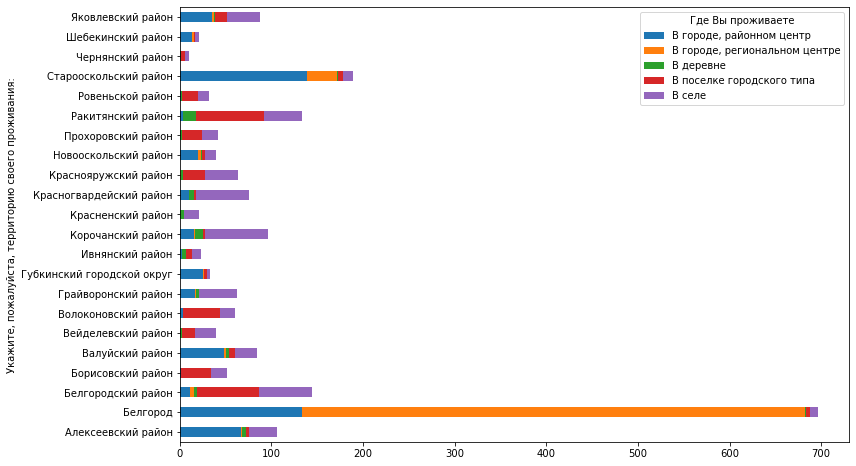

In [1321]:
territory = pd.crosstab(family['Укажите, пожалуйста, территорию своего проживания:'],
            family['Где Вы проживаете'])

territory.plot.barh(stacked=True, figsize=(12,8));

In [1322]:
conditions = pd.crosstab(family['Ваше жилье'], family['Ваши условия проживания можно назвать'])
conditions

Ваши условия проживания можно назвать,Достаточно комфортными (удобными) для проживания с ребенком-инвалидом,"Не пригодными (нет того, что Вам крайне необходимо) для проживания с ребенком-инвалидом",Недостаточно пригодными (жилье недостаточно обустроено под Ваши нужды) для проживания с ребенком-инвалидом,Пригодными (жилье обустроено под нужды ребенка) для проживания с ребенком-инвалидом
Ваше жилье,,,,
Вы снимаете жилье,63,16,33,60
Жилье Вам предоставлено (социальное жилье),15,4,8,9
Находится в вашей собственности (в собственности ваших ближайших родственников),1104,35,249,512


In [1323]:
pd.crosstab(family['Где Вы проживаете'], family['Ваше жилье'])

Ваше жилье,Вы снимаете жилье,Жилье Вам предоставлено (социальное жилье),Находится в вашей собственности (в собственности ваших ближайших родственников)
Где Вы проживаете,,,
"В городе, районном центр",57,8,479
"В городе, региональном центре",74,12,515
В деревне,4,3,59
В поселке городского типа,21,4,326
В селе,16,9,521


In [1324]:
family['Ваши условия проживания (укажите все ответы, которые соответствуют Вашей ситуации)'].value_counts().head(10)

Дом частной застройки, туалет в доме                                                           902
Многоквартирный дом с лифтом                                                                   194
Дом частной застройки, туалет на улице                                                         166
Многоквартирный дом с лифтом, Трехкомнатная (или более) квартира/три и более комнаты в доме    124
Многоквартирный дом с лифтом, Двухкомнатная квартира/две комнаты в доме                         89
Многоквартирный дом без лифта, ваш этаж 2-3                                                     72
Многоквартирный дом без лифта, ваш этаж выше 3                                                  67
Двухкомнатная квартира/две комнаты в доме                                                       62
Многоквартирный дом без лифта, ваш этаж 1                                                       58
Трехкомнатная (или более) квартира/три и более комнаты в доме                                   45
Name: Ваши

In [1325]:
pd.crosstab(family['Ваши условия проживания (укажите все ответы, которые соответствуют Вашей ситуации)'], family['Ваше жилье'])\
            .sort_values(by=['Вы снимаете жилье', 'Жилье Вам предоставлено (социальное жилье)',
                             'Находится в вашей собственности (в собственности ваших ближайших родственников)'], 
                              ascending=False).head(10)

Ваше жилье,Вы снимаете жилье,Жилье Вам предоставлено (социальное жилье),Находится в вашей собственности (в собственности ваших ближайших родственников)
"Ваши условия проживания (укажите все ответы, которые соответствуют Вашей ситуации)",,,
"Дом частной застройки, туалет в доме",29,11,862
Многоквартирный дом с лифтом,21,5,168
Однокомнатная квартира/ комната в доме,15,3,21
"Многоквартирный дом с лифтом, Двухкомнатная квартира/две комнаты в доме",13,0,76
"Дом частной застройки, туалет на улице",11,4,151
"Многоквартирный дом без лифта, ваш этаж выше 3",10,2,55
"Многоквартирный дом с лифтом, Трехкомнатная (или более) квартира/три и более комнаты в доме",9,4,111
"Многоквартирный дом без лифта, ваш этаж 1",9,1,48
"Многоквартирный дом с лифтом, Однокомнатная квартира/ комната в доме",9,0,28


<b>Гипотеза 2</b> - дети с ОВЗ воспитываются в крупных городах, где они могут получать своевременную медицинскую помощь и помощь специалистов сопровождения. Жилье комфортное и обустроено под нужды ребенка с особенностями развития.


Подавляющее большинство респондентов живут в Белгороде (696 опрошенных), Старооскольском (189), Белгородском (144) и Ракитянском районах (133).

<b>Вторая гипотеза подтвердилась частично</b> - в региональном центре (Белгород) живет 601 семья, в городе-районном центре - 544 семьи. Остальные опрошенные (944 семьи) живут в селах, поселках и деревнях.

1 900 семей имеют жилье в собственности, 172 семьи снимают жилье, остальные живут в соцжилье.

56% респондентов считают свое жилье достаточно комфортным и удобными для проживания с ребенком-инвалидом, еще 13% - пригодными и  обустроенным под нужды ребенка-инвалида. 

# <b>Гипотеза 3</b> - 
родители (законные представители) ребенка с ОВЗ получили достойное образование, работают и работают по специальности. Появление ребенка с ОВЗ не ограничило трудовую деятельность родителей (законных представителей).

In [1326]:
mother = dict(family['Укажите, пожалуйста, образование родителей: Мать'].value_counts())
data_mother = [list(mother.keys()), list(mother.values())]

father = dict(family['Укажите, пожалуйста, образование родителей: Отец'].value_counts())
data_father = [list(father.keys()), list(father.values())]

In [1327]:
education = pd.DataFrame(data_mother).T.rename(columns={0: 'уровень образования', 1:'мать'})\
    .merge(pd.DataFrame(data_father).T.rename(columns={0: 'уровень образования', 1:'отец'}), on='уровень образования')

In [1328]:
education

,уровень образования,мать,отец
0,высшее профессиональное,1094,673
1,среднее профессиональное (техникум),534,589
2,начальное профессиональное (ПТУ),147,176
3,общее среднее (10-11 классов),99,96
4,неполное среднее (8-9 классов),92,82
5,незаконченное высшее профессиональное,82,83


In [1329]:
family['Опишите, пожалуйста, трудовую деятельность родителей ребенка (при отсутствии одного из родителей, пропустите вопрос). Мать'].value_counts().head(10)

Работает, полная занятость, официальное трудоустройство                                              767
Не работает, в связи с уходом за ребенком                                                            759
Работает, самозанятость                                                                               55
Не работает, но готова работать на частичной занятости                                                54
Работает, частичная (неполный рабочий день) занятость                                                 52
Работает, полная занятость, неофициальное трудоустройство                                             45
Не работает, в связи с уходом за ребенком, Не работает, но готова работать на частичной занятости     43
Не работает, на пенсии                                                                                43
Не работает, но готова работать на полной занятости                                                   21
Не работает по состоянию здоровья                      

In [1330]:
family['Опишите, пожалуйста, трудовую деятельность родителей ребенка (при отсутствии одного из родителей, пропустите вопрос). Отец'].value_counts().head(10)

работает, полная занятость, официальное трудоустройство      1059
работает, полная занятость, неофициальное трудоустройство     123
работает, самозанятость                                       120
не работает, в связи с уходом за ребенком                      85
не работает, на пенсии                                         29
работает, более чем на одном рабочем месте                     23
не работает по состоянию здоровья                              21
работает, частичная (неполный рабочий день) занятость          19
не работает, но готов работать на полной занятости             14
не работает, но готова работать на полной занятости             9
Name: Опишите, пожалуйста, трудовую деятельность родителей ребенка (при отсутствии одного из родителей, пропустите вопрос). Отец, dtype: int64

In [1331]:
family['Укажите сферы деятельности родителей (если трудовая деятельность ведется), можно выбрать несколько вариантов, для обоих родителей'].value_counts().head(10)

Производство, промышленность                                            218
Сельское хозяйство, лесничество, мелиорация                             120
Строительство и недвижимость                                            116
Торговля (предприятия оптовой и розничной торговли)                     108
Наука и образование, культура                                           104
Медицина, здравоохранение                                                78
Сфера услуг (общественное питание, гостиницы, парикмахерские и т.д.)     74
Жилищное и коммунальное хозяйство                                        70
Социальное обеспечение                                                   50
Армия, полиция                                                           49
Name: Укажите сферы деятельности родителей (если трудовая деятельность ведется), можно выбрать несколько вариантов, для обоих родителей, dtype: int64

In [1332]:
family['Нуждаетесь ли Вы (или другой родитель) в профессиональной подготовке, переподготовке, повышении квалификации'].value_counts()

0.0    1698
1.0     410
Name: Нуждаетесь ли Вы (или другой родитель) в профессиональной подготовке, переподготовке, повышении квалификации, dtype: int64

In [1333]:
family['Если Вы работаете, Вы работаете по специальности (другой родитель, при совместном проживании)'].value_counts().head(10)

Все родители работают по специальности       500
Отец работает не по специальности            338
Затрудняюсь ответить                         276
Все родители работают не по специальности    274
Мать работает не по специальности            235
Не работаю                                    18
Отец работает по специальности                11
Мать не работает                               8
не работаю                                     5
Мать работает по специальности                 5
Name: Если Вы работаете, Вы работаете по специальности (другой родитель, при совместном проживании), dtype: int64

<b>Гипотеза 3</b> - родители (законные представители) ребенка с ОВЗ получили достойное образование, работают и работают по специальности. Появление ребенка с ОВЗ не ограничило трудовую деятельность родителей (законных представителей).


При проверке первой гипотезы мы отметили гендерный перекос - в опросе приняло участие больше женщин, чем мужчин. Этот гендерный перекос интересно отразился в срезе по уровню образования.
Количество мужчин, получивших высшее профессиональное и среднее профессиональное (техникум) образование примерно равно - 673 и 589 респондентов.
Женщин, получивших высшее образование в два раза больше, чем женщин, получивших среднее профессиональное образование - 1094 и 534 человека.


Мужчин и женщин получивших начальное профессиональное (ПТУ), общее среднее (10-11 классов), неполное среднее (8-9 классов) и незаконченное высшее профессиональное образование оказалось примерно поровну.

80% опрошенных не нуждаются в профессиональной подготовке или переподготовки, при этом мы имеем данные о 500 семьях, где оба родителя работают по специальности, 11 - где только отец работает по специальности и 5, где только мать работает по специальности. Остальные - либо не работают, либо работают не по специальности.

Гендерный перекос наблюдается в описании трудовой деятельности матерей и отцов из полных семей:
- работающих с полной занятостью (официальное и неофициальное трудоустройство) и неработающих в связи с уходом за ребенком матерей примерно поровну (812 и 759 респондентов)
- работающих с полной занятостью (официальное и неофициальное трудоустройство) и неработающих в связи с уходом за ребенком отцов - 1182 и 85 человек, соответственно.

> Возможно респонденты неправильно поняли суть вопросов про трудовую деятельность. Вопросы сформированы как 'Опишите, пожалуйста, трудовую деятельность родителей ребенка (при отсутствии одного из родителей, пропустите вопрос) (Мать / Отец)', что подразумевает только членов полных семей. Из предыдущих шагов мы помним, что полных семей в базе - 1509. Суммарное количество матерей и отцов, которые заполнили эти графы, на порядок превышает количество полных семей.

Основные сферы деятельности родитилей - 'Производство, промышленность', 'Сельское хозяйство, лесничество, мелиорация' и 
'Строительство и недвижимость'.

<b>Третья гипотеза также подтвердилась частично.</b>

# <b>Гипотеза 4</b> - 
доходы семьи достаточно высокие для обеспечения потребностей всех членов семьи. Появление ребенка с инвалидностью не подорвало семейный бюджет.

12500.0

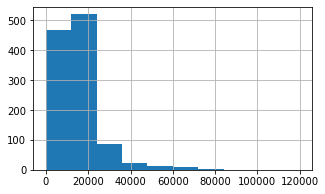

In [1334]:
family['Укажите, пожалуйста, примерный среднедушевой доход в месяц (на 1 члена семьи), в рублях'].hist(figsize=(5,3));
family['Укажите, пожалуйста, примерный среднедушевой доход в месяц (на 1 члена семьи), в рублях'].median()

Согласно имеющимся у нас данным, медианное значение среднедушевого дохода в месяц на 1 члена семьи (не указан возраст члена семьи) составляет 12 500 руб.

В соответствии с постановлением правительства Белгородской области от 19.12.2022 года № 758-п "Об установлении величины прожиточного минимума по Белгородской области на 2023 года" прожиточный минимум составляет в расчете на душу населения – 12 075 руб., для трудоспособного населения – 13 162 руб. пенсионеров – 10 385 руб. детей - 11 713 руб.

На гистограмме выше мы видим "хвост" который тянется до отметки в 120 000 руб. и дальше.

Возможно, респонденты:
- не поняли вопрос анкеты и подумали, что их спрашивают о ежемесячном доходе,
- ошиблись и вписали лишние нули,
- очень хорошо живут в белгородской области.

In [1335]:
family['Описывая размер семейного дохода, можно сказать'].value_counts()

Семье хватает средств на необходимые траты, но на большие покупки и отдых приходится копить (брать кредит)      666
Семье хватает средств на необходимые траты, связанные с питанием, одеждой, оплатой счетов и лечения             596
Семье с трудом хватает средств на необходимые траты, связанные с питанием, одеждой, оплатой счетов и лечения    499
Семье не хватает средств на необходимые траты, связанные с питанием, одеждой, оплатой счетов и лечения          198
Семье хватает средств не только на необходимые траты, но и на большие покупки, комфортный отдых                 149
Name: Описывая размер семейного дохода, можно сказать, dtype: int64

In [1336]:
# family['Как бы Вы сами определили уровень жизни семьи'].value_counts()

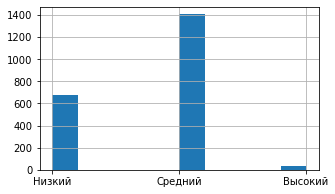

In [1337]:
family['Как бы Вы сами определили уровень жизни семьи'].hist(figsize=(5,3));

In [1338]:
family['Сколько примерно, в процентном соотношении от дохода семьи, уходит на обслуживание ребенка-инвалида%'].value_counts()

До 50%       788
До 25%       744
До 75%       270
До 10%       194
Более 75%    112
Name: Сколько примерно, в процентном соотношении от дохода семьи, уходит на обслуживание ребенка-инвалида%, dtype: int64

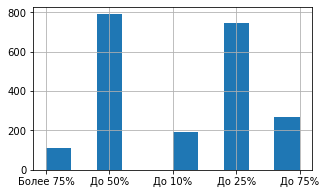

In [1339]:
family['Сколько примерно, в процентном соотношении от дохода семьи, уходит на обслуживание ребенка-инвалида%'].hist(figsize=(5,3));

<b>Гипотеза 4</b> - доходы семьи достаточно высокие для обеспечения потребностей всех членов семьи. Появление ребенка с инвалидностью не подорвало семейный бюджет.

Согласно имеющимся у нас данным, медианное значение среднедушевого дохода в месяц на 1 члена семьи (не указан возраст члена семьи) составляет 12 500 руб.

В соответствии с постановлением правительства Белгородской области от 19.12.2022 года № 758-п "Об установлении величины прожиточного минимума по Белгородской области на 2023 года" прожиточный минимум составляет в расчете на душу населения – 12 075 руб., для трудоспособного населения – 13 162 руб. пенсионеров – 10 385 руб. детей - 11 713 руб.

На гистограмме выше мы видим "хвост" который тянется до отметки в 120 000 руб. и дальше.

Возможно, респонденты:
- не поняли вопрос анкеты и подумали, что их спрашивают о ежемесячном доходе,
- ошиблись и вписали лишние нули,
- очень хорошо живут в белгородской области.

60% респондентов ответили, что семье хватает на наобходимые траты, но не на большие покупки. 7% считает, что семье хватает на необходимые траты, крупные покупки и отдых. Остальным респондентам не хватает или с трудом хватает средств на необходимые траты.

38% респондентов сообщили, что на обслуживание ребенка-инвалида уходит до 50% семейного дохода, еще 37% считают, что выделяют на нужды ребенка с ОВЗ до 25%.

<b>Четвертая гипотеза частично подтвердилась</b> - большая часть респондентов характеризуют свой уровень жизни, как средний.


# <b>Гипотеза 5</b> - 
дети не ограничены в своем праве на получение образования, посещают образовательные учреждения.

In [1340]:
family['Вид образовательной организации, в которой обучается Ваш ребенок:'].value_counts()

школьник                                                     1472
дошкольник                                                    559
ребенок, по роду заболевания, не может проходить обучение      52
выпускник                                                      25
Name: Вид образовательной организации, в которой обучается Ваш ребенок:, dtype: int64

In [1341]:
education = pd.DataFrame([
    dict(quality['Посещает ли (или посещал в свое время) ваш ребенок учреждения образования? Дошкольное образовательное учреждение'].value_counts()),
    dict(quality['Посещает ли (или посещал в свое время) ваш ребенок учреждения образования? Школьное образовательное учреждение'].value_counts()),
    dict(quality['Посещает ли (или посещал в свое время) ваш ребенок учреждения образования? Учреждение дополнительного образования'].value_counts()),
    dict(quality['Получает ли ребенок психолого-педагогическую, коррекционную помощь, указанную в заключении ПМПК'].value_counts()),
    dict(quality['Занимается ли ваш ребенок физкультурой и спортом'].value_counts()),
    dict(quality['Получаете ли ваш ребенок услуги реабилитации'].value_counts()),
    dict(quality['Если ваш ребенок посещает образовательную организацию, разработала ли образовательная организация адаптированную основную общеобразовательную программу в соответствии с заключением ПМПК'].value_counts())
             ], 
    index=['Посещает / посещал: дошкольное образование', 
            'Посещает / посещал: школьное образование', 
            'Посещает / посещал: учреждение дополнительного образования',
            'Получает помощь, указанную в заключении ПМПК', 
            'Занимается физкультурой и спортом',
            'Получает ли услуги реабилитации',
            'Посещает / посещал: разработка адаптированной программы'
           ]).fillna(0)

In [1342]:
# стоит еще выполнить преобразование "колонок", согласно расшифровке

education

,1.0,-1.0,0.5,-0.5,0.0
Посещает / посещал: дошкольное образование,1334,391,295,88.0,0.0
Посещает / посещал: школьное образование,1386,509,169,44.0,0.0
Посещает / посещал: учреждение дополнительного образования,653,950,355,150.0,0.0
"Получает помощь, указанную в заключении ПМПК",553,171,264,0.0,0.0
Занимается физкультурой и спортом,588,495,630,395.0,0.0
Получает ли услуги реабилитации,359,899,539,311.0,0.0
Посещает / посещал: разработка адаптированной программы,572,85,182,0.0,189.0


<b>Гипотеза 5</b> - дети не ограничены в своем праве на получение образования, посещают образовательные учреждения.

Только 52 респондента сообщили, что их дети не могут проходить обучение по роду своего заболевания. Остальные респонденты отметили, что их дети находятся на разных уровнях образования - дошкольники, школьники и выпускники. 

66% детей посещали детские сады и школу.

Детские сады посещают/посещали - 66% детей и не посещали - 19%. Школы посещают/посещали - 68% детей и не посещали - 25%.

572 респондента отметили, что во время посещения образовательной организации для ребенка с ОВЗ разрабатывалась адаптированная программа.

В сфере услуг дополнительного образования, физкультуры и спорта и реабилитации ситуация значительно хуже:
- только 32% процента опрошенных сообщили, что дети посещали учреждения доп образования,
- 29% детей занимаются физкультурой и спортом,
- и 18% получают услуги реабилитации.

Данные перекликаются с проверкой гипотезы №2 - почти половина респондентов живут в сельской местности, где может просто не быть специалистов, подготовленных для работы с детьми с особыми потребностями.

<b>Пятая гипотеза так же частично подтвердилась</b> - дети с особыми потребностями имеют доступ к основному образованию (школьному и дошкольному), но ограничены в получении адаптированной образовательной программы, разработанной под их нужды.

Так же дети ограничены в получении допобразования, занятиях физкультурой, спортом и реабилитации.

# <b>Гипотеза 6</b> - 
родителям оказывают помощь ближайшего окружения (родственники и друзья), а там же соцработники.

In [1343]:
p3 = [family.shape[0]]

p3_columns = [
    family['Оказывает ли Вам кто-то помощь в уходе за ребенком-инвалидом Помогают члены семьи, проживающие вместе с ребенком'],
    family['Оказывает ли Вам кто-то помощь в уходе за ребенком-инвалидом Помогают родственники, проживающие отдельно'],
    family['Оказывает ли Вам кто-то помощь в уходе за ребенком-инвалидом Помогают знакомые и друзья'],
    family['Оказывает ли Вам кто-то помощь в уходе за ребенком-инвалидом Помогают социальные работники'],
    family['Оказывает ли Вам кто-то помощь в уходе за ребенком-инвалидом Помогают оплачиваемые приходящие работники (няня, сиделка и др.)']
             ]

for column in p3_columns:
    p3.append(int(column.sum()))

In [1344]:
index_p3 = ['Всего респондентов', 'Помогают члены семьи, проживающие вместе с ребенком', 
            'Помогают родственники, проживающие отдельно', 
            'Помогают знакомые и друзья',
            'Помогают социальные работники', 'Помогают оплачиваемые приходящие работники']
columns_p3 = ['']
pivot_help = pd.DataFrame(p3, index_p3, columns_p3)

In [1345]:
pivot_help

,
Всего респондентов,2109
"Помогают члены семьи, проживающие вместе с ребенком",1229
"Помогают родственники, проживающие отдельно",874
Помогают знакомые и друзья,318
Помогают социальные работники,218
Помогают оплачиваемые приходящие работники,99


In [1346]:
# выделим респондентов, которым никто не оказывает помощь в уходе за ребенком

non_support = family[(family['Оказывает ли Вам кто-то помощь в уходе за ребенком-инвалидом Помогают члены семьи, проживающие вместе с ребенком']==0) &
       (family['Оказывает ли Вам кто-то помощь в уходе за ребенком-инвалидом Помогают родственники, проживающие отдельно']==0) &
       (family['Оказывает ли Вам кто-то помощь в уходе за ребенком-инвалидом Помогают знакомые и друзья']==0) &
       (family['Оказывает ли Вам кто-то помощь в уходе за ребенком-инвалидом Помогают социальные работники']==0) &
       (family['Оказывает ли Вам кто-то помощь в уходе за ребенком-инвалидом Помогают оплачиваемые приходящие работники (няня, сиделка и др.)']==0)]

non_support.shape[0]

516

In [1347]:
# выделим неполные семьи

non_support[non_support['Опишите, пожалуйста, ваш состав семьи Неполная семья (один родитель)']==1].shape[0]

160

<b>Гипотеза 6</b> - родителям оказывают помощь ближайшего окружения (родственники и друзья), а там же соцработники.

Из 2109 опрошенных:
- помогают члены семьи, проживающие вместе с ребенком - 1 229,
- помогают родственники, проживающие отдельно - 874
- помогают знакомые и друзья- 318
- помогают социальные работники - 218
- помогают оплачиваемые приходящие работники - 99.

Полученные данные достаточно позитивные (семьи с детьми-инвалидами в большинстве своем не остаются без поддержки) и <b>частично подверждают шестую гипотезу</b>: из 2 109 опрошенных 356 полных семей и 160 неполных семей воспитывают детей с особыми потребностями самостоятельно, не получая помощи от окружающих и соцработников. 

<a id="conclusion"> </a>
# Общий вывод

В исходном датасете было 2108 строк, каждая строка - ответы участника опроса, 208 колонок.

Количество пропущенных значений варьируется взависимости от типа вопроса: вопросы, требующие развернутого ответа, чаще игнорировались респондентами (например, 'Если Вы не пользовались услугами психолого-медико-педагогической комиссии для Вашего ребенка, в чем причина?'). 

Имеющийся у нас датасет - это оцифрованный опросник, который заполняли официальные представители детей с ограниченными возможностями здоровья.

Изучив данные, мы можем условно разделить все колонки-"вопросы" на две группы:
- "вопросы", относящиеся к качеству предоставляемых услуг в регионе
- и "вопросы", относящиеся непосредственно к ребенку и членам его семьи (состав семьи, нозология, уровень дохода, место проживания и прочее).


Анализируя имеющийся датасет, мы смогли состасить примерный портрет семьи, воспитывающей ребенка с ограниченными возможностями здоровья. В датасете 2108 наблюдений, каждое наблюдение - ответы на вопросы опросника одного из членов семьи. 



# <b>Формулирование и проверка гипотез</b>

# <b>Гипотеза 1</b> - 
дети с ограниченными возможностями здоровья воспитываются в полных семьях, их воспитание занимается мать и отец.


Из 2 109 опрошенных, 1 509 - члены полных семей (мать и отец). В опросе принимали участие матери, отцы и законные представители детей с ОВЗ. Большая часть респондентов - матери (1 383 человека из полных семей и 569 - из неполных). Такой гендерный перекос можно объяснить тем, что матери чаще занимаются детьми и больше вовлечены в их воспитание.


В 10 неполных семьях ребенка с ОВЗ воспитывает отец и в 20 - законный представитель (опекун).


<b>Первая гипотеза подтвердилась.</b>

Дополнительно изучив состав семьи мы выяснили, что 665 опрошенных семей проживают совместно с родственниками. Из этого числа, 138 семей проживают с родственниками, требующими ухода.

> Семей с одним ребенком - 716, с двумя - 955, три и более - 466, суммарно это дает нам 2137 семей, что превышает количество опрошенных семей.

> Напрашивается два вывода:
>- либо в данных ошибка,
>- либо часть респондентов не уверены, сколько детей в их семье.

Из 2 109 опрошенных семей, 207 имеют более одного ребенка с инвалидностью.

# <b>Гипотеза 2</b> - 
дети с ОВЗ воспитываются в крупных городах, где они могут получать своевременную медицинскую помощь и помощь специалистов сопровождения. Жилье комфортное и обустроено под нужды ребенка с особенностями развития.


Подавляющее большинство респондентов живут в Белгороде (696 опрошенных), Старооскольском (189), Белгородском (144) и Ракитянском районах (133).

<b>Вторая гипотеза подтвердилась частично</b> - в региональном центре (Белгород) живет 601 семья, в городе-районном центре - 544 семьи. Остальные опрошенные (944 семьи) живут в селах, поселках и деревнях.

1 900 семей имеют жилье в собственности, 172 семьи снимают жилье, остальные живут в соцжилье.

56% респондентов считают свое жилье достаточно комфортным и удобными для проживания с ребенком-инвалидом, еще 13% - пригодными и  обустроенным под нужды ребенка-инвалида. 

# <b>Гипотеза 3</b> - 
родители (законные представители) ребенка с ОВЗ получили достойное образование, работают и работают по специальности. Появление ребенка с ОВЗ не ограничило трудовую деятельность родителей (законных представителей).


При проверке первой гипотезы мы отметили гендерный перекос - в опросе приняло участие больше женщин, чем мужчин. Этот гендерный перекос интересно отразился в срезе по уровню образования.
Количество мужчин, получивших высшее профессиональное и среднее профессиональное (техникум) образование примерно равно - 673 и 589 респондентов.
Женщин, получивших высшее образование в два раза больше, чем женщин, получивших среднее профессиональное образование - 1094 и 534 человека.


Мужчин и женщин получивших начальное профессиональное (ПТУ), общее среднее (10-11 классов), неполное среднее (8-9 классов) и незаконченное высшее профессиональное образование оказалось примерно поровну.

80% опрошенных не нуждаются в профессиональной подготовке или переподготовки, при этом мы имеем данные о 500 семьях, где оба родителя работают по специальности, 11 - где только отец работает по специальности и 5, где только мать работает по специальности. Остальные - либо не работают, либо работают не по специальности.

Гендерный перекос наблюдается в описании трудовой деятельности матерей и отцов из полных семей:
- работающих с полной занятостью (официальное и неофициальное трудоустройство) и неработающих в связи с уходом за ребенком матерей примерно поровну (812 и 759 респондентов)
- работающих с полной занятостью (официальное и неофициальное трудоустройство) и неработающих в связи с уходом за ребенком отцов - 1182 и 85 человек, соответственно.

> Возможно респонденты неправильно поняли суть вопросов про трудовую деятельность. Вопросы сформированы как 'Опишите, пожалуйста, трудовую деятельность родителей ребенка (при отсутствии одного из родителей, пропустите вопрос) (Мать / Отец)', что подразумевает только членов полных семей. Из предыдущих шагов мы помним, что полных семей в базе - 1509. Суммарное количество матерей и отцов, которые заполнили эти графы, на порядок превышает количество полных семей.

Основные сферы деятельности родитилей - 'Производство, промышленность', 'Сельское хозяйство, лесничество, мелиорация' и 
'Строительство и недвижимость'.

<b>Третья гипотеза также подтвердилась частично.</b>

# <b>Гипотеза 4</b> - 
доходы семьи достаточно высокие для обеспечения потребностей всех членов семьи. Появление ребенка с инвалидностью не подорвало семейный бюджет.

Согласно имеющимся у нас данным, медианное значение среднедушевого дохода в месяц на 1 члена семьи (не указан возраст члена семьи) составляет 12 500 руб.

В соответствии с постановлением правительства Белгородской области от 19.12.2022 года № 758-п "Об установлении величины прожиточного минимума по Белгородской области на 2023 года" прожиточный минимум составляет в расчете на душу населения – 12 075 руб., для трудоспособного населения – 13 162 руб. пенсионеров – 10 385 руб. детей - 11 713 руб.

На гистограмме выше мы видим "хвост" который тянется до отметки в 120 000 руб. и дальше.

Возможно, респонденты:
- не поняли вопрос анкеты и подумали, что их спрашивают о ежемесячном доходе,
- ошиблись и вписали лишние нули,
- очень хорошо живут в белгородской области.

60% респондентов ответили, что семье хватает на наобходимые траты, но не на большие покупки. 7% считает, что семье хватает на необходимые траты, крупные покупки и отдых. Остальным респондентам не хватает или с трудом хватает средств на необходимые траты.

38% респондентов сообщили, что на обслуживание ребенка-инвалида уходит до 50% семейного дохода, еще 37% считают, что выделяют на нужды ребенка с ОВЗ до 25%.

<b>Четвертая гипотеза частично подтвердилась</b> - большая часть респондентов характеризуют свой уровень жизни, как средний.

# <b>Гипотеза 5</b> - 
дети не ограничены в своем праве на получение образования, посещают образовательные учреждения.

Только 52 респондента сообщили, что их дети не могут проходить обучение по роду своего заболевания. Остальные респонденты отметили, что их дети находятся на разных уровнях образования - дошкольники, школьники и выпускники. 

66% детей посещали детские сады и школу.

Детские сады посещают/посещали - 66% детей и не посещали - 19%. Школы посещают/посещали - 68% детей и не посещали - 25%.

572 респондента отметили, что во время посещения образовательной организации для ребенка с ОВЗ разрабатывалась адаптированная программа.

В сфере услуг дополнительного образования, физкультуры и спорта и реабилитации ситуация значительно хуже:
- только 32% процента опрошенных сообщили, что дети посещали учреждения доп образования,
- 29% детей занимаются физкультурой и спортом,
- и 18% получают услуги реабилитации.

Данные перекликаются с проверкой гипотезы №2 - почти половина респондентов живут в сельской местности, где может просто не быть специалистов, подготовленных для работы с детьми с особыми потребностями.

<b>Пятая гипотеза так же частично подтвердилась</b> - дети с особыми потребностями имеют доступ к основному образованию (школьному и дошкольному), но ограничены в получении адаптированной образовательной программы, разработанной под их нужды.

Так же дети ограничены в получении допобразования, занятиях физкультурой, спортом и реабилитации.

# <b>Гипотеза 6</b> - 
родителям оказывают помощь ближайшего окружения (родственники и друзья), а там же соцработники.

Из 2109 опрошенных:
- помогают члены семьи, проживающие вместе с ребенком - 1 229,
- помогают родственники, проживающие отдельно - 874
- помогают знакомые и друзья- 318
- помогают социальные работники - 218
- помогают оплачиваемые приходящие работники - 99.

Полученные данные достаточно позитивные (семьи с детьми-инвалидами в большинстве своем не остаются без поддержки) и <b>частично подверждают шестую гипотезу</b>: из 2 109 опрошенных 356 полных семей и 160 неполных семей воспитывают детей с особыми потребностями самостоятельно, не получая помощи от окружающих и соцработников. 